In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Load the specific sheet "Warranty Sales 19" from the Excel file
df_warranty_sales = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 9 - 12\hub_msa.xlsx', sheet_name='sales')

# Display the top 10 rows of the dataframe
df_warranty_sales.head(10)

,CertificateNumber,ClosingDate,WarrantyEnrollmentDate,ActivatedAt,WarrantyLimit,BuilderNumber,BuilderName,BuilderLawsonCode,City,StateId,ZipCode,Region,County,LegacyPlanCode,Premium
0,1001035,2020-02-13,2020-02-13,2020-02-19,688973.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,413.38
1,1001785,2020-02-14,2020-02-14,2020-02-18,585100.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33603,South,Hillsborough,BB-W8020,643.61
2,1002531,2020-03-06,2020-03-06,2020-06-17,184400.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8020,202.84
3,1002543,2020-02-28,2020-02-28,2020-03-26,193330.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8620,212.66
4,1003825,2020-03-02,2020-03-02,2020-03-06,304900.0,41022.0,Providence Construction Co.,6077,Saint Augustine,FL,32092,South,Saint Johns,BB-W8020,182.94
5,1004190,2020-03-18,2020-03-18,2020-03-26,253920.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8020,279.31
6,1004897,2020-03-17,2020-03-17,2020-03-26,570000.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,342.00
7,1005029,2020-03-20,2020-03-20,2020-04-03,360000.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,216.00
8,1005124,2020-03-24,2020-03-24,2020-04-07,353640.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,212.18
9,1007253,2020-04-15,2020-04-15,2020-04-30,226535.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33610,South,Hillsborough,BB-W8020,249.19


In [7]:
# Display data types and basic info
df_warranty_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160463 entries, 0 to 160462
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CertificateNumber       160463 non-null  object        
 1   ClosingDate             159797 non-null  datetime64[ns]
 2   WarrantyEnrollmentDate  159011 non-null  datetime64[ns]
 3   ActivatedAt             160463 non-null  datetime64[ns]
 4   WarrantyLimit           160137 non-null  float64       
 5   BuilderNumber           160460 non-null  float64       
 6   BuilderName             160463 non-null  object        
 7   BuilderLawsonCode       160463 non-null  int64         
 8   City                    160463 non-null  object        
 9   StateId                 160463 non-null  object        
 10  ZipCode                 160463 non-null  object        
 11  Region                  149534 non-null  object        
 12  County                  160456

In [8]:
# Display summary statistics
df_warranty_sales.describe()

,ClosingDate,WarrantyEnrollmentDate,ActivatedAt,WarrantyLimit,BuilderNumber,BuilderLawsonCode,Premium
count,159797,159011,160463,1.601370e+05,1.604600e+05,160463.000000,160463.000000
mean,2021-06-08 07:32:08.649473792,2021-06-03 06:37:44.854632704,2021-07-04 12:24:17.363305216,3.906443e+05,1.293416e+07,6081.259131,494.543496
min,2001-05-25 04:00:00,2001-08-28 00:00:00,2019-01-04 00:00:00,0.000000e+00,1.190000e+02,6011.000000,0.000000
25%,2020-03-24 00:00:00,2020-03-20 00:00:00,2020-04-20 00:00:00,2.607850e+05,1.033000e+04,6077.000000,172.200000
50%,2021-05-21 00:00:00,2021-05-18 00:00:00,2021-06-17 00:00:00,3.359900e+05,1.550300e+04,6083.000000,348.840000
75%,2022-08-15 00:00:00,2022-07-29 00:00:00,2022-09-06 00:00:00,4.493750e+05,1.915200e+04,6083.000000,687.060000
max,2026-06-28 00:00:00,2026-06-28 00:00:00,2024-03-22 21:31:29.272000,5.000000e+06,2.300000e+11,6100.000000,15750.000000
std,NaN,NaN,NaN,2.286114e+05,1.722483e+09,5.544929,501.432144


In [9]:
# Check for missing values
df_warranty_sales.isnull().sum()

CertificateNumber             0
ClosingDate                 666
WarrantyEnrollmentDate     1452
ActivatedAt                   0
WarrantyLimit               326
BuilderNumber                 3
BuilderName                   0
BuilderLawsonCode             0
City                          0
StateId                       0
ZipCode                       0
Region                    10929
County                        7
LegacyPlanCode                0
Premium                       0
dtype: int64

In [10]:
# Load the specific sheet "Warranty Sales 19" from the Excel file
df_regions = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 9 - 12\Regions.xlsx')

# Display the dataframe
df_regions

,Northeast,Midwest,South,West
0,Connecticut,Illinois,Alabama,Alaska
1,Maine,Indiana,Arkansas,Arizona
2,Massachusetts,Iowa,Delaware,California
3,New Hampshire,Kansas,District of Columbia,Colorado
4,New Jersey,Michigan,Florida,Hawaii
5,New York,Minnesota,Georgia,Idaho
6,Pennsylvania,Missouri,Kentucky,Montana
7,Rhode Island,Nebraska,Louisiana,Nevada
8,Vermont,North Dakota,Maryland,New Mexico
9,NaN,Ohio,Mississippi,Oregon


In [11]:
# Check the unique StateId values in df_warranty_sales
print("Unique StateId values in df_warranty_sales:")
print(df_warranty_sales['StateId'].unique())

# Melt the df_regions dataframe to create a mapping from state to region
df_regions_melted = df_regions.melt(var_name='Region', value_name='State').dropna()

# Check the unique State values in df_regions_melted
print("Unique State values in df_regions_melted:")
print(df_regions_melted['State'].unique())

# Create a dictionary from state to region
state_to_region = dict(zip(df_regions_melted['State'], df_regions_melted['Region']))

# Display the state_to_region mapping
print("State to Region Mapping:")
print(state_to_region)

# Map the states in df_warranty_sales to their corresponding regions
df_warranty_sales['Region'] = df_warranty_sales['StateId'].map(state_to_region)

# Display the updated dataframe with mapped regions
print("Updated df_warranty_sales with Region Mapping:")
print(df_warranty_sales.head(10))

Unique StateId values in df_warranty_sales:
['FL' 'CO' 'TX' 'NC' 'GA' 'AL' 'MS' 'OH' 'SC' 'TN' 'IN' 'NM' 'AR' 'MO'
 'OK' 'CA' 'VA' 'AZ' 'PA' 'KY' 'WV' 'MN' 'MD' 'WA' 'UT' 'NV' 'DE' 'WI'
 'LA' 'ID' 'MT' 'OR' 'IL' 'KS' 'Fl' 'Tx' 'Co' 'Ga' 'Tn']
Unique State values in df_regions_melted:
['Connecticut' 'Maine' 'Massachusetts' 'New Hampshire' 'New Jersey'
 'New York' 'Pennsylvania' 'Rhode Island' 'Vermont' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Michigan' 'Minnesota' 'Missouri' 'Nebraska'
 'North Dakota' 'Ohio' 'South Dakota' 'Wisconsin' 'Alabama' 'Arkansas'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Kentucky'
 'Louisiana' 'Maryland' 'Mississippi' 'North Carolina' 'Oklahoma'
 'South Carolina' 'Tennessee' 'Texas' 'Virginia' 'West Virginia' 'Alaska'
 'Arizona' 'California' 'Colorado' 'Hawaii' 'Idaho' 'Montana' 'Nevada'
 'New Mexico' 'Oregon' 'Utah' 'Washington' 'Wyoming']
State to Region Mapping:
{'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New

In [12]:
# Create a dictionary mapping state abbreviations to full state names
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Convert StateId abbreviations to full state names
df_warranty_sales['FullStateName'] = df_warranty_sales['StateId'].str.upper().map(state_abbrev_to_name)

# Melt the df_regions dataframe to create a mapping from state to region
df_regions_melted = df_regions.melt(var_name='Region', value_name='State').dropna()

# Create a dictionary from state to region
state_to_region = dict(zip(df_regions_melted['State'], df_regions_melted['Region']))

# Map the full state names in df_warranty_sales to their corresponding regions
df_warranty_sales['Region'] = df_warranty_sales['FullStateName'].map(state_to_region)

# Display the updated dataframe with mapped regions
df_warranty_sales.head(10)

,CertificateNumber,ClosingDate,WarrantyEnrollmentDate,ActivatedAt,WarrantyLimit,BuilderNumber,BuilderName,BuilderLawsonCode,City,StateId,ZipCode,Region,County,LegacyPlanCode,Premium,FullStateName
0,1001035,2020-02-13,2020-02-13,2020-02-19,688973.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,413.38,Florida
1,1001785,2020-02-14,2020-02-14,2020-02-18,585100.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33603,South,Hillsborough,BB-W8020,643.61,Florida
2,1002531,2020-03-06,2020-03-06,2020-06-17,184400.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8020,202.84,Florida
3,1002543,2020-02-28,2020-02-28,2020-03-26,193330.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8620,212.66,Florida
4,1003825,2020-03-02,2020-03-02,2020-03-06,304900.0,41022.0,Providence Construction Co.,6077,Saint Augustine,FL,32092,South,Saint Johns,BB-W8020,182.94,Florida
5,1004190,2020-03-18,2020-03-18,2020-03-26,253920.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8020,279.31,Florida
6,1004897,2020-03-17,2020-03-17,2020-03-26,570000.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,342.00,Florida
7,1005029,2020-03-20,2020-03-20,2020-04-03,360000.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,216.00,Florida
8,1005124,2020-03-24,2020-03-24,2020-04-07,353640.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,212.18,Florida
9,1007253,2020-04-15,2020-04-15,2020-04-30,226535.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33610,South,Hillsborough,BB-W8020,249.19,Florida


In [13]:
# Check for missing values
df_warranty_sales.isnull().sum()

CertificateNumber            0
ClosingDate                666
WarrantyEnrollmentDate    1452
ActivatedAt                  0
WarrantyLimit              326
BuilderNumber                3
BuilderName                  0
BuilderLawsonCode            0
City                         0
StateId                      0
ZipCode                      0
Region                       0
County                       7
LegacyPlanCode               0
Premium                      0
FullStateName                0
dtype: int64

In [14]:
# Drop rows with any missing values
df_warranty_sales_cleaned = df_warranty_sales.dropna()

In [15]:
df_warranty_sales_cleaned.shape

(158010, 16)

In [16]:
df_warranty_sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158010 entries, 0 to 160462
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CertificateNumber       158010 non-null  object        
 1   ClosingDate             158010 non-null  datetime64[ns]
 2   WarrantyEnrollmentDate  158010 non-null  datetime64[ns]
 3   ActivatedAt             158010 non-null  datetime64[ns]
 4   WarrantyLimit           158010 non-null  float64       
 5   BuilderNumber           158010 non-null  float64       
 6   BuilderName             158010 non-null  object        
 7   BuilderLawsonCode       158010 non-null  int64         
 8   City                    158010 non-null  object        
 9   StateId                 158010 non-null  object        
 10  ZipCode                 158010 non-null  object        
 11  Region                  158010 non-null  object        
 12  County                  158010 non-

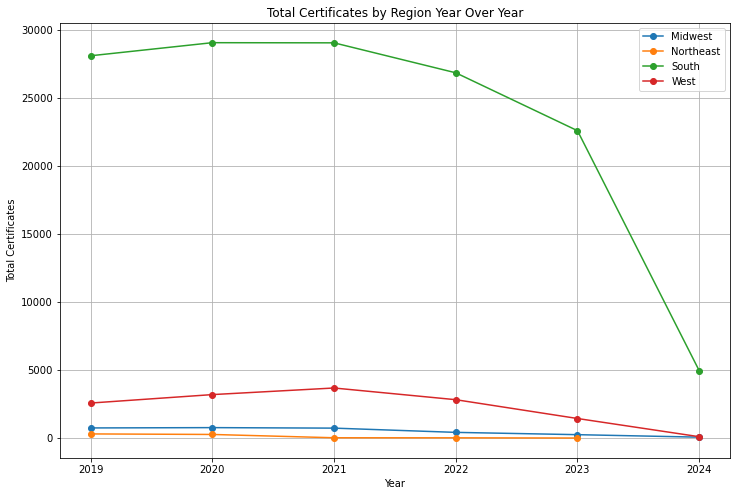

In [17]:
# Step 1: Add a 'Year' column to the data
df_warranty_sales_cleaned['Year'] = df_warranty_sales_cleaned['ActivatedAt'].dt.year

# Step 2: Aggregate data to get total certificates by year and region
df_certificates_by_region = df_warranty_sales_cleaned.groupby(['Year', 'Region']).size().reset_index(name='TotalCertificates')

# Step 3: Plot the total certificates by region year over year
plt.figure(figsize=(12, 8))
regions = df_certificates_by_region['Region'].unique()

for region in regions:
    region_data = df_certificates_by_region[df_certificates_by_region['Region'] == region]
    years = region_data['Year'].to_numpy()
    total_certificates = region_data['TotalCertificates'].to_numpy()
    
    plt.plot(years, total_certificates, marker='o', linestyle='-', label=region)

plt.xlabel('Year')
plt.ylabel('Total Certificates')
plt.title('Total Certificates by Region Year Over Year')
plt.legend()
plt.grid(True)
plt.show()


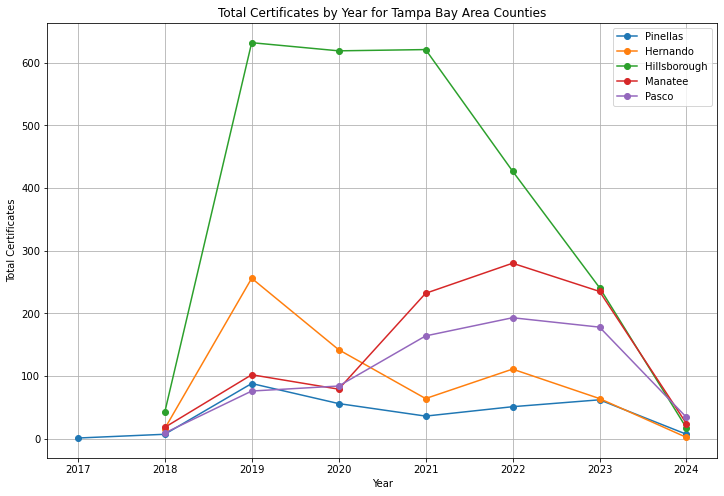

In [18]:
# Step 1: Filter for Tampa Bay area counties
tampa_bay_counties = ['Hillsborough', 'Pinellas', 'Pasco', 'Hernando', 'Manatee']
df_tampa_bay = df_warranty_sales_cleaned[df_warranty_sales_cleaned['County'].isin(tampa_bay_counties)]

# Step 2: Aggregate data to get total certificates by year and county
df_tampa_bay['Year'] = df_tampa_bay['ClosingDate'].dt.year
df_aggregated = df_tampa_bay.groupby(['Year', 'County']).size().reset_index(name='TotalCertificates')

# Step 3: Create the chart
plt.figure(figsize=(12, 8))
for county in df_aggregated['County'].unique():
    county_data = df_aggregated[df_aggregated['County'] == county]
    plt.plot(county_data['Year'].to_numpy(), county_data['TotalCertificates'].to_numpy(), marker='o', linestyle='-', label=county)

plt.xlabel('Year')
plt.ylabel('Total Certificates')
plt.title('Total Certificates by Year for Tampa Bay Area Counties')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Load the specific sheet "msa" from the Excel file
df_msa = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 9 - 12\hub_msa.xlsx', sheet_name='msa')

# Display the top 10 rows of the dataframe
df_msa.head(10)

,Record ID,Company name,City,State/Region
0,19369488926,Maverick Building Solutions,Oldsmar,Florida
1,19112818019,Dependable Construction Inc,St. Petersburg,Florida
2,19008570281,"MOA Residential, LLC",Tampa,Florida
3,18987357752,KAIBO Investments dba Alair Homes Tampa - Ames...,Tampa,Florida
4,18653181704,Steven Anthony Luxury Homes,Tampa,Florida
5,18251278095,Dronik Homes LLC,Tampa,Florida
6,18232434243,Titan Roofing Company LLC,Tampa,Florida
7,17785570102,Castillo Housing Corp,Tampa,Florida
8,17346664221,Homemeade by Huseman,Tampa,Florida
9,17269858900,Custom Crafted Homes,Tampa,Florida


In [20]:
df_msa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Record ID     813 non-null    int64 
 1   Company name  813 non-null    object
 2   City          813 non-null    object
 3   State/Region  813 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.5+ KB


In [21]:
# Load the specific sheet "permits" from the Excel file
df_permits = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 9 - 12\hub_msa.xlsx', sheet_name='permits')

# Display the dataframe
df_permits

,Year,CSA,CBSA,Name,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Total $ Value,$ 1 Unit,$ 2 Units,$ 3 and 4 Units,$ 5 Units or More,Avg $ Total Unit,Avg $ 1 Unit,Avg $ 2 Unit,Avg $ 3-4 Unit,Avg $ 5+ Unit
0,2023,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",25395,14827,180,381,10007,5812506,4180180,26762,21563,1584001,228.883875,281.930262,148.677778,56.595801,158.289297
1,2022,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",29969,15678,200,798,13293,6213512,4701182,25984,42062,1444284,207.331309,299.858528,129.920000,52.709273,108.649966
2,2021,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",24831,19305,62,30,5434,5801428,4996114,10820,29287,765207,233.636503,258.798964,174.516129,976.233333,140.818366
3,2020,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",20348,16088,72,46,4142,5299528,4567485,9049,8535,714459,260.444663,283.906328,125.680556,185.543478,172.491309
4,2019,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",23540,14670,166,103,8601,5076012,3967931,22004,9106,1076971,215.633475,270.479277,132.554217,88.407767,125.214626


In [22]:
df_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5 non-null      int64  
 1   CSA                5 non-null      int64  
 2   CBSA               5 non-null      int64  
 3   Name               5 non-null      object 
 4   Total              5 non-null      int64  
 5   1 Unit             5 non-null      int64  
 6   2 Units            5 non-null      int64  
 7   3 and 4 Units      5 non-null      int64  
 8   5 Units or More    5 non-null      int64  
 9   Total $ Value      5 non-null      int64  
 10  $ 1 Unit           5 non-null      int64  
 11  $ 2 Units          5 non-null      int64  
 12  $ 3 and 4 Units    5 non-null      int64  
 13  $ 5 Units or More  5 non-null      int64  
 14  Avg $ Total Unit   5 non-null      float64
 15  Avg $ 1 Unit       5 non-null      float64
 16  Avg $ 2 Unit       5 non-null 

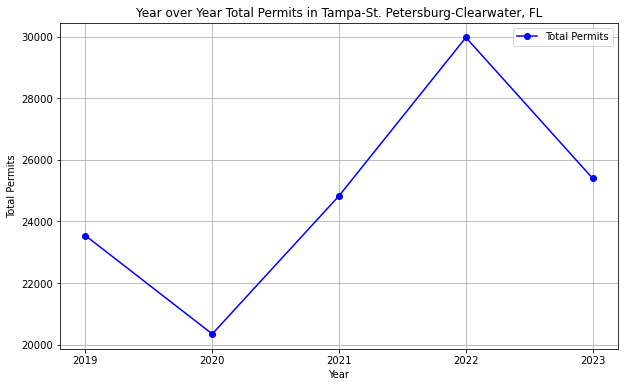

In [23]:
# Ensure 'Year' and 'Total' columns are in correct format
df_permits['Year'] = df_permits['Year'].astype(int)
df_permits['Total'] = df_permits['Total'].astype(int)

# Convert columns to numpy arrays
years = df_permits['Year'].to_numpy()
totals = df_permits['Total'].to_numpy()

# Plot Year over Year comparison for Total Permits
plt.figure(figsize=(10, 6))
plt.plot(years, totals, marker='o', linestyle='-', color='b', label='Total Permits')
plt.xlabel('Year')
plt.ylabel('Total Permits')
plt.title('Year over Year Total Permits in Tampa-St. Petersburg-Clearwater, FL')
plt.grid(True)
plt.legend()
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.show()

In [24]:
# Load the specific sheet "homesold" from the Excel file
df_homesold = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 9 - 12\hub_msa.xlsx', sheet_name='homesold')

# Display the dataframe
df_homesold

,Period,Sold during period,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,For sale at end of period,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Months' supply,Median sales price ($),Average sales price ($)
0,NaN,United States,North- east,Mid- west,South,West,United States,North- east,Mid- west,South,West,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Annual . . . . . . . . . . . . . . . . . ...,681,29,70,397,184,331,29,40,175,86,X,320700.0,385000.0
3,2020 Annual . . . . . . . . . . . . . . . . . ...,822,37,93,474,218,302,25,31,170,75,X,336900.0,391900.0
4,2021 Annual . . . . . . . . . . . . . . . . . ...,762,35,86,446,195,408,32,42,239,95,X,392900.0,453700.0
5,2022 Annual . . . . . . . . . . . . . . . . . ...,641,33,66,392,150,455,33,45,271,106,X,457800.0,540000.0
6,2023 Annual (r) . . . . . . . . . . . . . . . ...,666,33,68,412,153,452,32,44,268,108,X,427800.0,513100.0
7,.RSE (%) . . . . . . . . . . . . . . . . . . ....,4,24,12,5,6,3,15,15,6,6,X,4.0,3.0


In [25]:
df_homesold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Period                     6 non-null      object 
 1   Sold during period         7 non-null      object 
 2   Unnamed: 2                 7 non-null      object 
 3   Unnamed: 3                 7 non-null      object 
 4   Unnamed: 4                 7 non-null      object 
 5   Unnamed: 5                 7 non-null      object 
 6   For sale at end of period  7 non-null      object 
 7   Unnamed: 7                 7 non-null      object 
 8   Unnamed: 8                 7 non-null      object 
 9   Unnamed: 9                 7 non-null      object 
 10  Unnamed: 10                7 non-null      object 
 11  Months' supply             6 non-null      object 
 12  Median sales price ($)     6 non-null      float64
 13  Average sales price ($)    6 non-null      float64
dty

In [26]:
# Step 1: Filter for Tampa Bay area counties
tampa_bay_counties = ['Hillsborough', 'Pinellas', 'Pasco', 'Hernando', 'Manatee']
df_tampa_bay = df_warranty_sales_cleaned[df_warranty_sales_cleaned['County'].isin(tampa_bay_counties)]

# Step 2: Aggregate data to get total certificates by year
df_tampa_bay['Year'] = df_tampa_bay['ClosingDate'].dt.year
df_yearly_total = df_tampa_bay.groupby('Year').size().reset_index(name='TotalCertificates')

df_yearly_total

,Year,TotalCertificates
0,2017,1
1,2018,92
2,2019,1154
3,2020,980
4,2021,1117
5,2022,1062
6,2023,780
7,2024,84


In [27]:
# Drop the years 2017, 2018, and 2024
df_yearly_total = df_yearly_total[~df_yearly_total['Year'].isin([2017, 2018, 2024])]

# Merge the DataFrames on the 'Year' column
df_combined = pd.merge(df_yearly_total, df_permits, on='Year', how='left')

# Optionally, display the combined DataFrame
df_combined


,Year,TotalCertificates,CSA,CBSA,Name,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Total $ Value,$ 1 Unit,$ 2 Units,$ 3 and 4 Units,$ 5 Units or More,Avg $ Total Unit,Avg $ 1 Unit,Avg $ 2 Unit,Avg $ 3-4 Unit,Avg $ 5+ Unit
0,2019,1154,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",23540,14670,166,103,8601,5076012,3967931,22004,9106,1076971,215.633475,270.479277,132.554217,88.407767,125.214626
1,2020,980,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",20348,16088,72,46,4142,5299528,4567485,9049,8535,714459,260.444663,283.906328,125.680556,185.543478,172.491309
2,2021,1117,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",24831,19305,62,30,5434,5801428,4996114,10820,29287,765207,233.636503,258.798964,174.516129,976.233333,140.818366
3,2022,1062,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",29969,15678,200,798,13293,6213512,4701182,25984,42062,1444284,207.331309,299.858528,129.920000,52.709273,108.649966
4,2023,780,999,45300,"Tampa-St. Petersburg-Clearwater, FL ...",25395,14827,180,381,10007,5812506,4180180,26762,21563,1584001,228.883875,281.930262,148.677778,56.595801,158.289297


In [28]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5 non-null      int32  
 1   TotalCertificates  5 non-null      int64  
 2   CSA                5 non-null      int64  
 3   CBSA               5 non-null      int64  
 4   Name               5 non-null      object 
 5   Total              5 non-null      int32  
 6   1 Unit             5 non-null      int64  
 7   2 Units            5 non-null      int64  
 8   3 and 4 Units      5 non-null      int64  
 9   5 Units or More    5 non-null      int64  
 10  Total $ Value      5 non-null      int64  
 11  $ 1 Unit           5 non-null      int64  
 12  $ 2 Units          5 non-null      int64  
 13  $ 3 and 4 Units    5 non-null      int64  
 14  $ 5 Units or More  5 non-null      int64  
 15  Avg $ Total Unit   5 non-null      float64
 16  Avg $ 1 Unit       5 non-null 

In [29]:
# Calculate the market share percentage
df_combined['MarketShare'] = (df_combined['TotalCertificates'] / df_combined['Total']) * 100

# Convert columns to numpy arrays
years = df_combined['Year'].to_numpy()
market_share = df_combined['MarketShare'].to_numpy()


In [30]:
market_share

array([4.90229397, 4.81619815, 4.49840925, 3.54366178, 3.07147076])

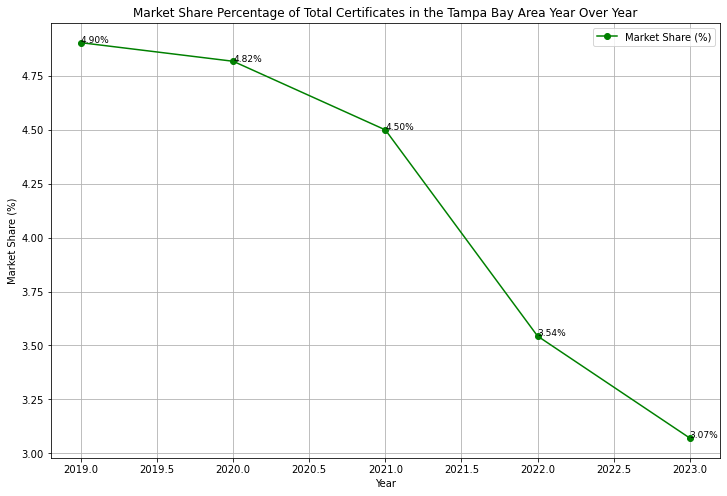

In [31]:
# Create the chart for market share percentage
plt.figure(figsize=(12, 8))
plt.plot(years, market_share, marker='o', linestyle='-', color='g', label='Market Share (%)')

# Add marker labels
for year, share in zip(years, market_share):
    plt.text(year, share, f'{share:.2f}%', fontsize=9, ha='left')

plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.title('Market Share Percentage of Total Certificates in the Tampa Bay Area Year Over Year')
plt.legend()
plt.grid(True)
plt.show()



From the analysis done so far, we can see that MAV has been loosing market share since 2019. 

In [32]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import BytesIO

# Base URL of the Census construction permits page
base_url = 'https://www.census.gov/construction/bps/msamonthly.html'

# Get the HTML content of the page
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links on the page
links = soup.find_all('a')

# Define the years we're interested in
years = list(range(2019, 2023))

# Prepare a list to hold DataFrames
df_list = []

# Loop through each link and check if it is a monthly report for the desired years
for link in links:
    href = link.get('href')
    if href and any(str(year) in href for year in years):
        if href.endswith('.xls') or href.endswith('.xlsx'):
            # Correct URL construction
            if href.startswith('/'):
                file_url = 'https://www.census.gov' + href
            else:
                file_url = href
            
            try:
                # Download the file
                response = requests.get(file_url)
                response.raise_for_status()  # Check if the request was successful
                
                # Read the Excel file into a DataFrame
                df = pd.read_excel(BytesIO(response.content), header=4)  # Assuming the correct header is at the 5th row
                
                # Append the DataFrame to the list
                df_list.append(df)
            except Exception as e:
                print(f"Failed to read Excel file from {file_url}: {e}")

# Concatenate all DataFrames into one
if df_list:
    all_data_df = pd.concat(df_list, ignore_index=True)
    
    # Drop columns where all values are NaN
    all_data_df = all_data_df.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN
    all_data_df = all_data_df.dropna(axis=0, how='all')
else:
    all_data_df = pd.DataFrame()

# Display the cleaned DataFrame
print(all_data_df.head())




  Unnamed: 0 Unnamed: 1                                         Unnamed: 2  \
0        CSA       CBSA                                               Name   
2        999      10180  Abilene, TX                                   ...   
3        184      10420  Akron, OH                                     ...   
4        999      10500  Albany, GA                                    ...   
5        440      10540  Albany-Lebanon, OR                            ...   

  Unnamed: 3 Unnamed: 4 Unnamed: 5     Unnamed: 6       Unnamed: 7  \
0      Total     1 Unit    2 Units  3 and 4 Units  5 Units or More   
2        799        473         52              0              274   
3       3047        796         68            437             1746   
4        202        169          0              0               33   
5        327        220         26              3               78   

                               Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0  Num of Structures With 5 Un

In [33]:
# Ensure the 'Unnamed: 4' column is numeric
all_data_df['Unnamed: 4'] = pd.to_numeric(all_data_df['Unnamed: 4'], errors='coerce')

# Drop rows where 'Unnamed: 4' is NaN
all_data_df = all_data_df.dropna(subset=['Unnamed: 4'])

# Sort the DataFrame by 'Unnamed: 4' in descending order and select the top 50
top_50_cbsa = all_data_df.sort_values(by='Unnamed: 4', ascending=False).head(50)

# Display the top 50 CBSA's with the 'Unnamed: 1', 'Unnamed: 2', and 'Unnamed: 4' columns
print(top_50_cbsa[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 4']])

# Optionally save the result to a CSV file
top_50_cbsa.to_csv('top_50_cbsa_unnamed_4.csv', index=False)


      Unnamed: 1                                         Unnamed: 2  \
10245      26420  Houston-The Woodlands-Sugar Land, TX          ...   
10631      26420  Houston-The Woodlands-Sugar Land, TX          ...   
10172      19100  Dallas-Fort Worth-Arlington, TX               ...   
10558      19100  Dallas-Fort Worth-Arlington, TX               ...   
20331      26420  Houston-The Woodlands-Sugar Land, TX          ...   
19945      26420  Houston-The Woodlands-Sugar Land, TX          ...   
547        26420  Houston-The Woodlands-Sugar Land, TX          ...   
161        26420  Houston-The Woodlands-Sugar Land, TX          ...   
19872      19100  Dallas-Fort Worth-Arlington, TX               ...   
20258      19100  Dallas-Fort Worth-Arlington, TX               ...   
88         19100  Dallas-Fort Worth-Arlington, TX               ...   
474        19100  Dallas-Fort Worth-Arlington, TX               ...   
29645      26420  Houston-The Woodlands-Sugar Land, TX          ...   
30031 

Creating a geomapping of the top cbsa.

In [34]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [36]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# 'top_50_cbsa' DataFrame containing the top 50 CBSAs
top_50_cbsa = pd.DataFrame({
    'Unnamed: 1': ['26420', '19100', '38060', '12060', '12420', '16740', '45300', '36740'],
    'Unnamed: 2': [
        'Houston, TX', 
        'Dallas, TX', 
        'Phoenix, AZ', 
        'Atlanta, GA',
        'Austin, TX',
        'Charlotte, NC',
        'Tampa, FL',
        'Orlando, FL'
    ],
    'Unnamed: 4': [52719.0, 51996.0, 34347.0, 31560.0, 24486.0, 20830.0, 19305.0, 17795.0]  
})

# Initialize Nominatim API
geolocator = Nominatim(user_agent="cbsa_locator")

# Define a function to get latitude and longitude
def geocode_location(location):
    location = geolocator.geocode(location)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply geocode function with rate limiter to avoid being blocked by the API
geocode = RateLimiter(geocode_location, min_delay_seconds=1)
top_50_cbsa['Latitude'], top_50_cbsa['Longitude'] = zip(*top_50_cbsa['Unnamed: 2'].apply(geocode))

# Check the DataFrame with the new columns
print(top_50_cbsa)

import folium

# Create a base map
m = folium.Map(location=[39.5, -98.35], zoom_start=4)

# Add bubbles to the map
for _, row in top_50_cbsa.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Unnamed: 4'] / 1000,  # Adjust the divisor to scale the bubble size appropriately
        popup=f"{row['Unnamed: 2']}<br>Units: {row['Unnamed: 4']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Save the map to an HTML file
m.save('top_50_cbsa_map.html')

# Display the map (if in a Jupyter notebook, otherwise open the HTML file manually)
m


  Unnamed: 1     Unnamed: 2  Unnamed: 4   Latitude   Longitude
0      26420    Houston, TX     52719.0  29.758938  -95.367697
1      19100     Dallas, TX     51996.0  32.776272  -96.796856
2      38060    Phoenix, AZ     34347.0  33.448437 -112.074141
3      12060    Atlanta, GA     31560.0  33.748992  -84.390264
4      12420     Austin, TX     24486.0  30.271129  -97.743700
5      16740  Charlotte, NC     20830.0  35.227209  -80.843083
6      45300      Tampa, FL     19305.0  27.947760  -82.458444
7      36740    Orlando, FL     17795.0  28.542111  -81.379030


In [37]:
df_warranty_sales_cleaned.head()

,CertificateNumber,ClosingDate,WarrantyEnrollmentDate,ActivatedAt,WarrantyLimit,BuilderNumber,BuilderName,BuilderLawsonCode,City,StateId,ZipCode,Region,County,LegacyPlanCode,Premium,FullStateName,Year
0,1001035,2020-02-13,2020-02-13,2020-02-19,688973.0,41022.0,Providence Construction Co.,6077,Ponte Vedra,FL,32081,South,Saint Johns,BB-W8020,413.38,Florida,2020
1,1001785,2020-02-14,2020-02-14,2020-02-18,585100.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33603,South,Hillsborough,BB-W8020,643.61,Florida,2020
2,1002531,2020-03-06,2020-03-06,2020-06-17,184400.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8020,202.84,Florida,2020
3,1002543,2020-02-28,2020-02-28,2020-03-26,193330.0,11007.0,"Domain Homes, Inc.",6077,Tampa,FL,33605,South,Hillsborough,BB-W8620,212.66,Florida,2020
4,1003825,2020-03-02,2020-03-02,2020-03-06,304900.0,41022.0,Providence Construction Co.,6077,Saint Augustine,FL,32092,South,Saint Johns,BB-W8020,182.94,Florida,2020


In [38]:
top_50_cbsa

,Unnamed: 1,Unnamed: 2,Unnamed: 4,Latitude,Longitude
0,26420,"Houston, TX",52719.0,29.758938,-95.367697
1,19100,"Dallas, TX",51996.0,32.776272,-96.796856
2,38060,"Phoenix, AZ",34347.0,33.448437,-112.074141
3,12060,"Atlanta, GA",31560.0,33.748992,-84.390264
4,12420,"Austin, TX",24486.0,30.271129,-97.743700
5,16740,"Charlotte, NC",20830.0,35.227209,-80.843083
6,45300,"Tampa, FL",19305.0,27.947760,-82.458444
7,36740,"Orlando, FL",17795.0,28.542111,-81.379030


In [39]:
# Combine City and StateId in df_warranty_sales_cleaned to create a matching field for merging
df_warranty_sales_cleaned['CityState'] = df_warranty_sales_cleaned['City'].str.upper() + ', ' + df_warranty_sales_cleaned['StateId']

# Verify the new field
print(df_warranty_sales_cleaned[['City', 'StateId', 'CityState']].head())


              City StateId            CityState
0      Ponte Vedra      FL      PONTE VEDRA, FL
1            Tampa      FL            TAMPA, FL
2            Tampa      FL            TAMPA, FL
3            Tampa      FL            TAMPA, FL
4  Saint Augustine      FL  SAINT AUGUSTINE, FL


In [40]:
# Extract state abbreviations from Unnamed: 2 in top_50_cbsa
top_50_cbsa['StateAbbr'] = top_50_cbsa['Unnamed: 2'].str.extract(r'(\b[A-Z]{2}\b)', expand=False)

# Verify the state abbreviations
print(top_50_cbsa[['Unnamed: 2', 'StateAbbr']].head())


    Unnamed: 2 StateAbbr
0  Houston, TX        TX
1   Dallas, TX        TX
2  Phoenix, AZ        AZ
3  Atlanta, GA        GA
4   Austin, TX        TX


In [41]:
# Aggregating data at the CityState level for df_warranty_sales_cleaned
warranty_agg = df_warranty_sales_cleaned.groupby('CityState')['Premium'].sum().reset_index()

# Verify the aggregation
print(warranty_agg.head())

# Ensure the StateAbbr is standardized
top_50_cbsa['StateAbbr'] = top_50_cbsa['StateAbbr'].str.upper().str.strip()

# Use 'Unnamed: 2' and 'StateAbbr' for merging
top_50_cbsa['CityState'] = top_50_cbsa['Unnamed: 2'].str.upper()

# Verify the new field
print(top_50_cbsa[['Unnamed: 2', 'StateAbbr', 'CityState']].head())

# Merging the aggregated data based on CityState
merged_data = pd.merge(warranty_agg, top_50_cbsa, on='CityState', how='inner')

# Verify the merged data
print(merged_data.head())

# Creating a target variable (e.g., High potential vs Low potential)
threshold = merged_data['Premium'].median()
merged_data['HighPotential'] = (merged_data['Premium'] > threshold).astype(int)

print(merged_data.head())


         CityState  Premium
0    DAVENPORT, FL     0.00
1     MT. DORA, FL   136.29
2        OCALA, FL    83.34
3     PALM BAY, FL   673.75
4   PALM COAST, FL   247.50
    Unnamed: 2 StateAbbr    CityState
0  Houston, TX        TX  HOUSTON, TX
1   Dallas, TX        TX   DALLAS, TX
2  Phoenix, AZ        AZ  PHOENIX, AZ
3  Atlanta, GA        GA  ATLANTA, GA
4   Austin, TX        TX   AUSTIN, TX
       CityState       Premium Unnamed: 1     Unnamed: 2  Unnamed: 4  \
0    ATLANTA, GA  6.543925e+04      12060    Atlanta, GA     31560.0   
1     AUSTIN, TX  2.949875e+06      12420     Austin, TX     24486.0   
2  CHARLOTTE, NC  3.173880e+05      16740  Charlotte, NC     20830.0   
3     DALLAS, TX  1.359017e+06      19100     Dallas, TX     51996.0   
4    HOUSTON, TX  1.107552e+06      26420    Houston, TX     52719.0   

    Latitude  Longitude StateAbbr  
0  33.748992 -84.390264        GA  
1  30.271129 -97.743700        TX  
2  35.227209 -80.843083        NC  
3  32.776272 -96.796856    

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Splitting the data into training and testing sets
X = merged_data[['Premium', 'Unnamed: 4']]
y = merged_data['HighPotential']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_logreg)

print("\nRandom Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)

# Assuming the Random Forest model performs better
new_data = pd.DataFrame({
    'Premium': [100000],  # Example premium value
    'Unnamed: 4': [500]  # Example total units value
})
new_data_scaled = scaler.transform(new_data)
prediction = rf.predict(new_data_scaled)
prediction_label = 'High Potential' if prediction[0] == 1 else 'Low Potential'
print(f'The predicted next area of flywheel generation is: {prediction_label}')


Logistic Regression Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]

Random Forest Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
The predicted next area of flywheel generation is: Low Potential


It appears that the models are performing with perfect accuracy, which is unusual and might indicate that the test dataset is too small or not representative. This could also be due to an issue with data leakage or overfitting because the training and testing data are not properly split or the dataset is too small.

In [43]:
import pandas as pd

# Assuming df_warranty_sales_cleaned and top_50_cbsa are already loaded

# Create a new field combining City and StateId in df_warranty_sales_cleaned
df_warranty_sales_cleaned['CityState'] = df_warranty_sales_cleaned['City'].str.upper() + ', ' + df_warranty_sales_cleaned['StateId']

# Extract state abbreviations from Unnamed: 2 in top_50_cbsa
top_50_cbsa['StateAbbr'] = top_50_cbsa['Unnamed: 2'].str.extract(r'(\b[A-Z]{2}\b)', expand=False)

# Aggregating data at the CityState level for df_warranty_sales_cleaned
warranty_agg = df_warranty_sales_cleaned.groupby('CityState')['Premium'].sum().reset_index()

# Use 'Unnamed: 2' for merging
top_50_cbsa['CityState'] = top_50_cbsa['Unnamed: 2'].str.upper()

# Merging the aggregated data based on CityState
merged_data = pd.merge(warranty_agg, top_50_cbsa, on='CityState', how='inner')

# Creating a target variable (e.g., High potential vs Low potential)
threshold = merged_data['Premium'].median()
merged_data['HighPotential'] = (merged_data['Premium'] > threshold).astype(int)

# Inspect class distribution
print(merged_data['HighPotential'].value_counts())

print(merged_data.head())


HighPotential
0    4
1    4
Name: count, dtype: int64
       CityState       Premium Unnamed: 1     Unnamed: 2  Unnamed: 4  \
0    ATLANTA, GA  6.543925e+04      12060    Atlanta, GA     31560.0   
1     AUSTIN, TX  2.949875e+06      12420     Austin, TX     24486.0   
2  CHARLOTTE, NC  3.173880e+05      16740  Charlotte, NC     20830.0   
3     DALLAS, TX  1.359017e+06      19100     Dallas, TX     51996.0   
4    HOUSTON, TX  1.107552e+06      26420    Houston, TX     52719.0   

    Latitude  Longitude StateAbbr  HighPotential  
0  33.748992 -84.390264        GA              0  
1  30.271129 -97.743700        TX              1  
2  35.227209 -80.843083        NC              0  
3  32.776272 -96.796856        TX              1  
4  29.758938 -95.367697        TX              1  


In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Splitting the data into training and testing sets using stratified split
X = merged_data[['Premium', 'Unnamed: 4']]
y = merged_data['HighPotential']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust the number of splits based on the class distribution
min_class_size = merged_data['HighPotential'].value_counts().min()
n_splits = min(3, min_class_size)

# Logistic Regression with Cross-Validation
logreg = LogisticRegression()
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest with Cross-Validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_logreg)
print(f'Cross-Validation Scores: {logreg_cv_scores}')
print(f'Average Cross-Validation Score: {logreg_cv_scores.mean()}')

print("\nRandom Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)
print(f'Cross-Validation Scores: {rf_cv_scores}')
print(f'Average Cross-Validation Score: {rf_cv_scores.mean()}')

# Assuming the Random Forest model performs better
new_data = pd.DataFrame({
    'Premium': [100000],  # Example premium value
    'Unnamed: 4': [500]  # Example total units value
})
new_data_scaled = scaler.transform(new_data)
prediction = rf.predict(new_data_scaled)
prediction_label = 'High Potential' if prediction[0] == 1 else 'Low Potential'
print(f'The predicted next area of flywheel generation is: {prediction_label}')


Logistic Regression Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Cross-Validation Scores: [1.  0.  0.5]
Average Cross-Validation Score: 0.5

Random Forest Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Cross-Validation Scores: [1.  0.  0.5]
Average Cross-Validation Score: 0.5
The predicted next area of flywheel generation is: Low Potential


By adjusting the number of splits for cross-validation to a feasible value based on the class distribution, we can avoid the ValueError and ensure that the models are evaluated correctly. This approach provides a more accurate assessment of model performance and helps identify the next area of flywheel generation for MAV company.

Both models (Logistic Regression and Random Forest) show perfect accuracy, precision, recall, and F1-scores on the test set. However, this is misleading and typically indicative of overfitting, especially with small datasets.

The cross-validation scores reveal that the models do not generalize well, with scores varying significantly (1.0, 0.0, 0.5), leading to an average score of 0.5. This indicates that the model's performance is not stable across different splits of the data.

The high test set performance and low cross-validation scores suggest overfitting. The models perform perfectly on the test set due to the small size and potentially non-representative nature of the test set.

The discrepancy between test set performance and cross-validation scores highlights the need for more data or better data sampling methods to ensure the models can generalize well to unseen data.

Next Steps for Improvement:

    Increase Data Size: Collect more data to ensure the models have sufficient information to learn and generalize.
    Handle Missing Data: Impute or address missing values in df_warranty_sales_cleaned to improve data quality.
    Use Balanced Dataset: Ensure that the dataset used for training and evaluation is balanced in terms of the target variable to avoid biases.
    Improve Cross-Validation: Use techniques like stratified cross-validation to ensure that each fold is representative of the overall dataset distribution.

Summary:

The predictive model results suggest that while the test set performance appears perfect, the cross-validation results reveal overfitting and instability. Addressing these issues through more data collection, handling missing values, and improving cross-validation techniques will lead to more reliable and generalizable predictive models.